**Модель была сформирована на платформе Jupiter Notebook и написана на языке программирования Python**

Пример алгоритма который применялся для создания данный нейросети (здесь показан сам принцип). Разобъем всю выборку данных на две части. Первая часть, как правило по объему больше, назовем обучающей выборкой. На ней мы обучим машину. Вторая часть выборки - тестовая. На ней мы проверим правильность обучения нашей машины.

1. Создадим первый перцептрон. Допустим у нас имеется выборка data_gold по изменению стоимости золота взависимости от расположения небесных тел. Данный dataset был заранее подготовлен, чтобы не затягивать с преобразованиями данных.

In [1]:
# Импорт необходимых библиотек для работы с данными
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np # математический модуль
import pandas as pd # модуль для работы с таблицами
from sklearn import preprocessing # sklearn модуль для машинного обучения
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
import seaborn as sns # модуль для вывода наглядной информации
from scipy import stats # модуль для работы с математической статистикой

In [2]:
# load new dataset about cost of gold
data_learn = pd.read_csv("data_gold.csv")
test_learn = pd.read_csv("test_gold.csv")
grade_learn = pd.read_csv("grade_gold.csv")

In [3]:
# посмотрим первые шесть строк датасета имеющейся выборки для обучения
data_learn.head(-1)

,Date,Ag,Au,dAg,dAu,P1,P2,P3,P4,P5,...,49,56,57,58,59,67,68,69,78,79
0,02/01/1970,1.80,34.98,1.31,0.24,77,54,93,82,56,...,38,19,54,42,12,73,23,31,96,42
1,05/01/1970,1.83,35.00,1.02,-0.17,78,66,94,83,56,...,39,20,54,42,12,74,22,32,96,42
2,06/01/1970,1.85,34.99,-1.16,0.24,78,70,94,83,56,...,39,21,54,42,12,75,21,33,96,42
3,07/01/1970,1.83,35.01,0.84,-0.24,78,75,94,83,56,...,39,21,54,42,12,75,21,33,96,42
4,08/01/1970,1.84,34.99,-0.23,-0.12,79,79,95,83,56,...,39,21,54,42,12,75,21,33,96,42
5,09/01/1970,1.84,34.99,-1.12,0.21,79,84,95,83,56,...,39,22,54,42,12,76,20,34,96,42
6,12/01/1970,1.81,35.00,0.91,0.00,80,97,95,82,57,...,38,22,55,41,13,77,19,35,96,42
7,13/01/1970,1.83,35.00,0.78,0.00,80,102,96,82,57,...,38,22,55,41,13,77,19,35,96,42
8,14/01/1970,1.84,35.00,1.38,0.00,81,106,96,82,57,...,38,23,55,41,13,78,18,36,96,42
9,15/01/1970,1.88,35.00,-1.01,0.17,81,2,96,81,57,...,37,23,55,41,13,78,18,36,96,42


Как видим у нас имеются данные о стоимости одной унции золота и серебра в долларах на лондонской бирже за каждый день торговой сессии. Также имеется изменение цен dAg, dAu в виде преобразования sqrt(abs(Ц2-Ц1)) * (знак). Далее посмотрим как распределяются величины в нашем датасете.

In [4]:
data_learn.describe()

,Ag,Au,dAg,dAu,P1,P2,P3,P4,P5,P6,...,49,56,57,58,59,67,68,69,78,79
count,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,...,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000,10042.000000
mean,6.638610,352.379636,0.020526,0.029221,52.784107,53.443238,50.320355,54.555567,54.725951,53.962956,...,35.002191,33.401713,34.405099,34.176758,36.401215,36.297351,36.172575,36.126170,34.810496,37.649970
std,4.316526,190.423699,1.190514,0.911030,31.104989,31.214305,30.553638,30.436573,29.522950,31.218191,...,24.401637,25.393479,25.002603,24.712540,24.900096,25.800994,25.423171,25.602967,22.460075,28.333022
min,1.270000,34.950000,-4.760000,-5.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.470000,264.650000,-0.940000,-0.690000,26.000000,26.000000,24.000000,29.000000,31.000000,27.000000,...,15.000000,13.000000,13.000000,14.000000,15.000000,14.000000,15.000000,14.000000,16.000000,12.000000
50%,5.240000,354.000000,0.000000,0.110000,52.000000,53.000000,48.000000,55.000000,57.000000,54.000000,...,29.000000,27.000000,29.000000,30.000000,32.000000,32.000000,32.000000,32.000000,33.000000,31.000000
75%,7.350000,411.737500,0.990000,0.750000,80.000000,81.000000,76.000000,81.000000,78.000000,81.000000,...,52.000000,50.000000,53.000000,48.000000,54.000000,55.000000,54.000000,53.000000,52.000000,59.000000
max,49.450000,1059.500000,6.050000,6.570000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,106.000000,106.000000,99.000000,104.000000,99.000000,107.000000,105.000000,107.000000,96.000000,104.000000


подготовим данные для обучения. Так как основным недостатком кластеризации и регресии является работа только с дискретными величинами, мы разобъем наши данные на интервалы и зашифруем. Для этого воспользуемся данными о генеральных совокупностях 'dAg' и 'dAu'. В таблице расчитаны среднеквадратичные отклонения, которые мы используем для разбиения выборки на доверительные интервалы.

In [5]:
# в совокупности dAu необходимо сместить наше распределение на -0.11
data_learn['dAu'] = data_learn['dAu'].apply(lambda x: x - .11)

исследуем распределение выборки генеральной совокупности на разброс случайных величин. Для этого выделим интервалы 1, 2 и 3 сигм

In [6]:
data_learn['dAgSigma'] = np.around((stats.zscore(data_learn['dAg'])), 0)
data_learn['dAuSigma'] = np.around((stats.zscore(data_learn['dAu'])), 0)

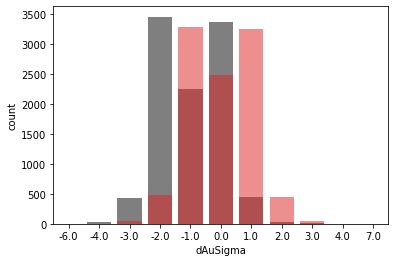

In [7]:
# выведем полученные результаты для обоих генеральных совокупностей
sns.countplot(data_learn['dAgSigma'], alpha=.5, color='Black')
sns.countplot(data_learn['dAuSigma'], alpha=.5, color='Red')

как видим с нашими данными все хорошо, большинство отклонений от среднего квадратичного находится в пределах 2 сигм.
Теперь разобьем нашу выборку на доверительные интервалы, по которым будем обучать нашу модель. Рассмотрим максимум, минимум размаха отсеянных значений генеральных совокупностей и составим доверительные интервалы.

In [8]:
data_learn[np.around(np.absolute(stats.zscore(data_learn['dAg'])), 0) < 3]['dAg'].describe()

count    9961.000000
mean        0.020380
std         1.150148
min        -2.950000
25%        -0.940000
50%         0.000000
75%         0.980000
max         2.990000
Name: dAg, dtype: float64

In [9]:
data_learn[np.around(np.absolute(stats.zscore(data_learn['dAu'])), 0) < 3]['dAu'].describe()

count    9953.000000
mean       -0.082598
std         0.877737
min        -2.340000
25%        -0.800000
50%         0.000000
75%         0.630000
max         2.190000
Name: dAu, dtype: float64

таким образом мы зашифруем (с учетом среднего значения) наши данные следующим образом. '-3' - данные за пределами распределения -2 сигм, '-2' интервал от минимального отсеянного значения до 25% всей выборки. '-1' - интервал от 25% всей выборки до 50% (в нашем случае это пограничное значение нуль), не включая нуль. Нуль является модой обеих выборок. '0' = 0.00; '1' - от 50% до 75%, '2' - от 75% до 100%. '3' - это те значения, которые образуют "выбросы" за пределы интервала 2 сигм.

In [10]:
n_min, n_25, n_50, n_75, n_max = 0, 1, 2, 3, 4
s_maxx = [-2.95, -0.94, 0, 0.98, 2.99]
g_maxx = [-2.34, -0.80, 0, 0.63, 2.19]

def num_bool(n_num, list):
    return sum([int(n_num < list[n_min])*(-3), int((list[n_min] <= n_num) & (n_num < list[n_25]))*(-2),
                         int((list[n_25] <= n_num) & (n_num < list[n_50]))*(-1),
                         int(n_num == list[n_50])*0, int((list[n_50] < n_num) & (n_num <= list[n_75]))*1,
                         int((list[n_75] < n_num) & (n_num <= list[n_max]))*2, int(n_num > list[n_max]) * 3])

for n in np.arange(len(data_learn)):
    s_num = data_learn['dAg'].iloc[n]
    g_num = data_learn['dAg'].iloc[n]
    data_learn.set_value(n, 'Ag_stat', num_bool(s_num, s_maxx))
    data_learn.set_value(n, 'Au_stat', num_bool(g_num, g_maxx))



In [11]:
# убедимся, что у нас все поля заполнены и не осталось NaN значений
print("Ag_stat unique:", data_learn['Ag_stat'].unique())
print("Au_stat unique:", data_learn['Au_stat'].unique())

Ag_stat unique: [ 2. -2.  1. -1.  0.  3. -3.]
Au_stat unique: [ 2. -2. -1.  1.  0.  3. -3.]


Ag_stat и Au_stat - значения, на которых наша модель будет обучаться, эти же значения отсутствуют в тестовой выборке. Это нужно для того, чтобы проверить на сколько верно обучилась модель. Чем болиже результат к 1.0000 тем точнее модель может прогнозировать.

In [12]:
# Составим тестовую и обучающую выборки
X_train = data_learn[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
                      '12', '13', '14', '15', '16', '17', '18', '19', '23',
                      '24', '25', '26', '27', '28', '29', '34', '35', '36',
                      '37', '38', '39', '45', '46', '47', '48', '49', '56',
                      '57', '58', '59', '67', '68', '69', '78', '79']]

X_test = test_learn[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
                      '12', '13', '14', '15', '16', '17', '18', '19', '23',
                      '24', '25', '26', '27', '28', '29', '34', '35', '36',
                      '37', '38', '39', '45', '46', '47', '48', '49', '56',
                      '57', '58', '59', '67', '68', '69', '78', '79']]

# y_silver и y_gold - значения, которым будет обучена модель, в результате совпадений группы признаков
y_silver = data_learn['Ag_stat']
y_gold = data_learn['Au_stat']

напишем функцию write_to_tested_file, которая сохраняет данные, в результате тестирования модели

In [13]:
def write_to_tested_file(predicted_labels, out_file, idnumber,
                    target='Survived', index_label="PassengerId"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(idnumber + 1,
                                                  idnumber + 1 +
                                                  predicted_labels.shape[0]),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

используем метод машинного обучения с использованием случайного леса. Поместим обучение по параметру y_silver

In [ ]:
# parameter combinations to try
forest_params = {'criterion': ('gini', 'entropy'),
                     'n_estimators': [50, 100],
                     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
                     'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}

locally_best_forest = GridSearchCV(RandomForestClassifier(random_state=48),
                                     forest_params,
                                     verbose=True, n_jobs=12, cv=44)
locally_best_forest.fit(X_train, y_silver)

print("Best params:", locally_best_forest.best_params_)
print("Best cross validaton score", locally_best_forest.best_score_)

Fitting 44 folds for each of 840 candidates, totalling 36960 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   11.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:   24.6s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:   43.1s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 2426 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done 3176 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done 4026 tasks      | elapsed:  4.6min
[Parallel(n_jobs=12)]: Done 4976 tasks      | elapsed:  6.1min
[Parallel(n_jobs=12)]: Done 6026 tasks      | elapsed:  7.9min


In [ ]:
#  сделаем прогноз используя тестовую выборку
predicted_labels = locally_best_forest.best_estimator_.predict(X_test)

In [ ]:
# запишем полученный тест в csv файл для получения достоверности прогнозирования модели
write_to_tested_file(predicted_labels, 'test_silver_file.csv')